# Supervised Learning of Coverage Status
In the last notebook we've seen that differen coverage states of the beads differ in there impedance profile (fingerprint), but got mixed results on unsupervised Learning to map the coverage state to clusters.

However I think there should be enough information in the data to train a supervised model to classify the different states of bead coverage.

## Plan of Action:

- Proof of concept:
  - use standard train_test_split to split data into test/training
  - use out-of-the-box classifiers to get "feeling" of what works
- Training mode:
  - (maybe construct training and validation set manually)
  - tune a few promising models from the above tested classifiers

## Proof of Concept

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("../data/processed/betrag_combined_1.csv")
df_features = df.iloc[:,0:-3]
df_features.head()

500.000000  601.132000  722.720000  868.900000  1044.648000  1255.943000  \
0   -7.179474   -7.450125   -4.417737   -6.485126    -4.512406    -6.968506   
1   -6.271736   -7.971743   -5.948047   -6.541946    -6.046966    -7.083067   
2  -21.012076    1.232146   19.579894   -6.618786    -5.916519    -6.562392   
3    5.551396   -0.917551    5.484907    1.290056     3.284358     1.823678   
4    4.000105    3.976715    6.069176    3.054561     2.317450    -0.559891   

   1509.976000  1815.390000  2182.579000  2624.037000  ...  952730.359000  \
0    -3.749690    -5.620006    -4.782567    -4.949482  ...      44.899848   
1    -5.768336    -4.665223    -5.411402    -4.882813  ...      47.184253   
2    -1.220457    -6.915504     0.150487    -4.087798  ...      28.229097   
3     1.541996     2.971513     1.627372     0.785321  ...      22.428472   
4    -0.255372     0.469859     0.725878     1.549762  ...      -4.650811   

   1145433.826000  1377114.352000  1655655.607000  1990535.853000  \
0       43.428812       37.545503       29.959587       29.602886   
1       41.527098       38.896625       33.494902       31.850661   
2       28.468683       22.583171       21.554944       17.927727   
3       19.475467       17.246760       18.125484       14.775380   
4       -4.682671       -5.005204       -4.818111       -4.502048   

   2393150.462000  2877199.687000  3459154.855000  4158818.856000  \
0       27.558236       25.273806       20.947400       17.193457   
1       31.054172       26.487576       23.204498       19.585654   
2       15.713433       14.426825       13.375134       11.424516   
3       13.482663       10.708193        8.906992        9.828735   
4       -5.111405       -5.844929       -4.954850       -5.306759   

   5000000.000000  
0       14.491506  
1       17.528195  
2        8.128726  
3        6.626761  
4       -5.802691  

[5 rows x 51 columns]

In [96]:
def predict_lazy(df, labels):
    X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.25, stratify=labels, random_state=42)
    clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
    models,predictions = clf.fit(X_train, X_test, y_train, y_test)
    print(models)
    return models, predictions

In [95]:
df_labels = df['coverage']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_labels, test_size=0.25, stratify=df_labels, random_state=42)

In [5]:
from lazypredict.Supervised import LazyClassifier

In [26]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|█████████████████████████████████████████████████████████████████████| 29/29 [00:47<00:00,  1.64s/it]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
SVC                                0.68               0.54    None      0.66   
PassiveAggressiveClassifier        0.63               0.52    None      0.58   
KNeighborsClassifier               0.63               0.51    None      0.61   
NuSVC                              0.63               0.51    None      0.61   
Perceptron                         0.47               0.50    None      0.32   
AdaBoostClassifier                 0.63               0.48    None      0.57   
LinearDiscriminantAnalysis         0.63               0.48    None      0.58   
LGBMClassifier                     0.63               0.48    None      0.60   
ExtraTreeClassifier                0.58               0.47    None      0.58   
BaggingClassifier                  0.58               0.47    None      0.59   
GaussianNB                         0.58 

#### With Scaling


In [97]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_features))
models, predictions = predict_lazy(df_scaled, df_labels)

100%|█████████████████████████████████████████████████████████████████████| 29/29 [00:47<00:00,  1.65s/it]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
KNeighborsClassifier               0.79               0.69    None      0.76   
NuSVC                              0.79               0.69    None      0.76   
LogisticRegression                 0.74               0.67    None      0.75   
ExtraTreesClassifier               0.74               0.65    None      0.73   
GaussianNB                         0.63               0.63    None      0.62   
BernoulliNB                        0.74               0.62    None      0.66   
LGBMClassifier                     0.68               0.61    None      0.68   
NearestCentroid                    0.68               0.61    None      0.67   
SVC                                0.74               0.61    None      0.72   
RandomForestClassifier             0.68               0.61    None      0.69   
DecisionTreeClassifier             0.68 

### Check for overfitting
to check for overfitting, we use the training data as test data

In [40]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(df_features, df_features, df_labels, df_labels)

100%|█████████████████████████████████████████████████████████████████████| 29/29 [01:10<00:00,  2.45s/it]


In [39]:
print(models)

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
RandomForestClassifier             1.00               1.00    None      1.00   
DecisionTreeClassifier             1.00               1.00    None      1.00   
ExtraTreeClassifier                1.00               1.00    None      1.00   
ExtraTreesClassifier               1.00               1.00    None      1.00   
BaggingClassifier                  0.98               0.98    None      0.98   
LabelPropagation                   0.82               0.78    None      0.82   
LabelSpreading                     0.82               0.78    None      0.82   
SVC                                0.82               0.77    None      0.81   
NuSVC                              0.80               0.75    None      0.79   
KNeighborsClassifier               0.78               0.73    None      0.78   
LGBMClassifier                     0.76 

### Train with max impedance as single feature

In [30]:
df_max = df_features.max(axis=1)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df_max.to_frame(), df_labels, test_size=0.25, stratify=df_labels, random_state=42)

In [24]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|█████████████████████████████████████████████████████████████████████| 29/29 [00:42<00:00,  1.45s/it]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
SVC                                0.68               0.54    None      0.66   
PassiveAggressiveClassifier        0.63               0.52    None      0.58   
KNeighborsClassifier               0.63               0.51    None      0.61   
NuSVC                              0.63               0.51    None      0.61   
Perceptron                         0.47               0.50    None      0.32   
AdaBoostClassifier                 0.63               0.48    None      0.57   
LinearDiscriminantAnalysis         0.63               0.48    None      0.58   
LGBMClassifier                     0.63               0.48    None      0.60   
ExtraTreeClassifier                0.58               0.47    None      0.58   
BaggingClassifier                  0.58               0.47    None      0.59   
GaussianNB                         0.58 

#### Compare overfitting
I expect that the overfitting with only the max impedance as single feature won't be a prolem in comparison to using all features

In [34]:
X_train.shape

(55, 1)

In [37]:
clf = LazyClassifier(verbose=0, custom_metric=None, ignore_warnings=True)
models, predictions = clf.fit(df_max.to_frame(), df_max.to_frame(), df_labels, df_labels)
                             
print(models)

100%|█████████████████████████████████████████████████████████████████████| 29/29 [01:04<00:00,  2.24s/it]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
RandomForestClassifier             0.99               0.97    None      0.99   
ExtraTreesClassifier               0.99               0.97    None      0.99   
DecisionTreeClassifier             0.99               0.97    None      0.99   
ExtraTreeClassifier                0.99               0.97    None      0.99   
BaggingClassifier                  0.92               0.89    None      0.92   
LabelSpreading                     0.77               0.70    None      0.76   
LabelPropagation                   0.77               0.70    None      0.76   
LGBMClassifier                     0.76               0.69    None      0.75   
GaussianNB                         0.76               0.69    None      0.75   
KNeighborsClassifier               0.74               0.68    None      0.73   
QuadraticDiscriminantAnalysis      0.76 

### Recap POC

- tree-based methods are prone to overfitting. Thus, they show a worse performance, but this could be fixed by feature engineering
- SVM based approaches together with KNN showed the best performance with our LazyClassfier. These approaches did not have a problem with overfitting
- using the max impedance value as single features did not significantly decrease overfitting. Using only the max however was suffcient to predict the classes

### Plan of Action
- First, we should use feature engineering and build our training dataset carefully to reduce overfitting. For that we could:
  - Use only frequencies with a lot of variance
  - Use output of dim reduction methods as features
  - desing training set, to reduce overfitting
- second, we fine tune the 4 promising models from our POC, namely:
  - KNeighborsClassifier
  - NuSVC
  - Random Forest
  - (deep learning based)





### Feature Engineering
#### 01 primitive frequency cut of
Firstl

<AxesSubplot: >

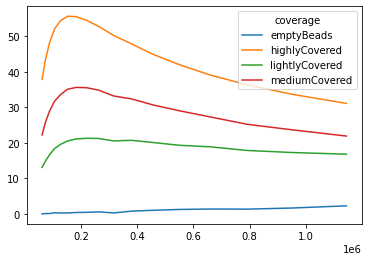

In [54]:
df_var_features = df_features.iloc[:,int(51*0.52):int(51*0.85)]
df_var_features['coverage'] = df_labels
df_plot = df_var_features.groupby('coverage').mean()
df_plot.columns = df_plot.columns.astype(float)
df_plot.T.plot()

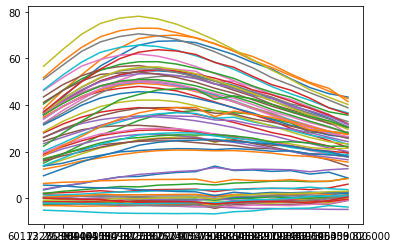

In [87]:
df_var_features.shape

for row,_ in df_var_features.iterrows():
    plt.plot(df_var_features.loc[row,:])

In [91]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_var_features_scaled = pd.DataFrame(scaler.fit_transform(df_var_features))

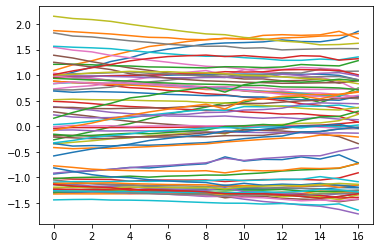

In [92]:
for row, _ in df_var_features_scaled.iterrows():
    plt.plot(df_var_features_scaled.iloc[row,:])

In [93]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
X_train, X_test, y_train, y_test = train_test_split(df_var_features_scaled, df_labels, test_size=0.25, stratify=df_labels)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

100%|█████████████████████████████████████████████████████████████████████| 29/29 [00:48<00:00,  1.68s/it]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
SVC                                0.89               0.81    None      0.89   
PassiveAggressiveClassifier        0.84               0.80    None      0.84   
LogisticRegression                 0.84               0.78    None      0.84   
LinearSVC                          0.79               0.71    None      0.78   
DecisionTreeClassifier             0.79               0.71    None      0.78   
LabelPropagation                   0.79               0.71    None      0.78   
LabelSpreading                     0.79               0.71    None      0.78   
NuSVC                              0.79               0.69    None      0.76   
GaussianNB                         0.79               0.69    None      0.76   
NearestCentroid                    0.79               0.69    None      0.76   
RandomForestClassifier             0.74 

#### 02 Dim reduction methods as features


In [56]:
latent_space = pd.read_csv('../data/processed/betrag_2_latent.csv')
pca_df = pd.read_csv('../data/processed/betrag_2_pca.csv')
processed_df = pd.read_csv('../data/processed/betrag_2_tsne.csv')

In [57]:
latent_space.head()

Unnamed: 0  500.000000  601.132000  722.720000  868.900000  1044.648000  \
0           0       -7.18       -7.45       -4.42       -6.49        -4.51   
1           1       -6.27       -7.97       -5.95       -6.54        -6.05   
2           2      -21.01        1.23       19.58       -6.62        -5.92   
3           3        5.55       -0.92        5.48        1.29         3.28   
4           4        4.00        3.98        6.07        3.05         2.32   

   1255.943000  1509.976000  1815.390000  2182.579000  ...  4158818.856000  \
0        -6.97        -3.75        -5.62        -4.78  ...           17.19   
1        -7.08        -5.77        -4.67        -5.41  ...           19.59   
2        -6.56        -1.22        -6.92         0.15  ...           11.42   
3         1.82         1.54         2.97         1.63  ...            9.83   
4        -0.56        -0.26         0.47         0.73  ...           -5.31   

   5000000.000000                                           filename  \
0           14.49  data/raw/highlyCovered_7/12.01.2022_08.29.30_4...   
1           17.53  data/raw/highlyCovered_7/12.01.2022_08.30.32_4...   
2            8.13  data/raw/mediumCovered_4/11.30.2022_08.23.24_2...   
3            6.63  data/raw/mediumCovered_2/09.14.2022_08.06.29_M...   
4           -5.80  data/raw/mediumCovered_2/09.14.2022_08.03.00_M...   

        coverage  experiment   max  max_rank  max_quantile  latent1  latent2  
0  highlyCovered           7 67.52      0.93          >.75   125.57    40.22  
1  highlyCovered           7 69.98      0.95          >.75   130.96    40.70  
2  mediumCovered           4 37.70      0.51       .25-.75    85.64    41.02  
3  mediumCovered           2 38.93      0.53       .25-.75    61.29     2.02  
4  mediumCovered           2  6.07      0.15          <.25    -0.08    -0.12  

[5 rows x 60 columns]

In [58]:
pca_df.head()

Unnamed: 0  500.000000  601.132000  722.720000  868.900000  1044.648000  \
0           0       -7.18       -7.45       -4.42       -6.49        -4.51   
1           1       -6.27       -7.97       -5.95       -6.54        -6.05   
2           2      -21.01        1.23       19.58       -6.62        -5.92   
3           3        5.55       -0.92        5.48        1.29         3.28   
4           4        4.00        3.98        6.07        3.05         2.32   

   1255.943000  1509.976000  1815.390000  2182.579000  ...  \
0        -6.97        -3.75        -5.62        -4.78  ...   
1        -7.08        -5.77        -4.67        -5.41  ...   
2        -6.56        -1.22        -6.92         0.15  ...   
3         1.82         1.54         2.97         1.63  ...   
4        -0.56        -0.26         0.47         0.73  ...   

                                            filename       coverage  \
0  data/raw/highlyCovered_7/12.01.2022_08.29.30_4...  highlyCovered   
1  data/raw/highlyCovered_7/12.01.2022_08.30.32_4...  highlyCovered   
2  data/raw/mediumCovered_4/11.30.2022_08.23.24_2...  mediumCovered   
3  data/raw/mediumCovered_2/09.14.2022_08.06.29_M...  mediumCovered   
4  data/raw/mediumCovered_2/09.14.2022_08.03.00_M...  mediumCovered   

   experiment   max  max_rank  max_quantile  latent1  latent2   PC1   PC2  
0           7 67.52      0.93          >.75   125.57    40.22 -4.66  7.95  
1           7 69.98      0.95          >.75   130.96    40.70 -5.24  8.78  
2           4 37.70      0.51       .25-.75    85.64    41.02  1.07  4.74  
3           2 38.93      0.53       .25-.75    61.29     2.02 -2.64 -1.74  
4           2  6.07      0.15          <.25    -0.08    -0.12  7.05 -4.24  

[5 rows x 62 columns]

In [59]:
tsne_df.head()

Unnamed: 0  500.000000  601.132000  722.720000  868.900000  1044.648000  \
0           0       -7.18       -7.45       -4.42       -6.49        -4.51   
1           1       -6.27       -7.97       -5.95       -6.54        -6.05   
2           2      -21.01        1.23       19.58       -6.62        -5.92   
3           3        5.55       -0.92        5.48        1.29         3.28   
4           4        4.00        3.98        6.07        3.05         2.32   

   1255.943000  1509.976000  1815.390000  2182.579000  ...  experiment   max  \
0        -6.97        -3.75        -5.62        -4.78  ...           7 67.52   
1        -7.08        -5.77        -4.67        -5.41  ...           7 69.98   
2        -6.56        -1.22        -6.92         0.15  ...           4 37.70   
3         1.82         1.54         2.97         1.63  ...           2 38.93   
4        -0.56        -0.26         0.47         0.73  ...           2  6.07   

   max_rank  max_quantile  latent1  latent2   PC1   PC2  TSNE1  TSNE2  
0      0.93          >.75   125.57    40.22 -4.66  7.95  35.78  -4.25  
1      0.95          >.75   130.96    40.70 -5.24  8.78  35.35  -3.18  
2      0.51       .25-.75    85.64    41.02  1.07  4.74 -28.10 -38.28  
3      0.53       .25-.75    61.29     2.02 -2.64 -1.74 -27.21 -27.40  
4      0.15          <.25    -0.08    -0.12  7.05 -4.24   2.34  40.05  

[5 rows x 64 columns]

In [68]:
df_dim_red = tsne_df.iloc[:,-6:]

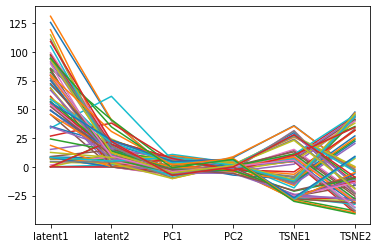

In [88]:
import matplotlib.pyplot as plt
for row,_ in df_dim_red.iterrows():
    plt.plot(df_dim_red.loc[row,:])

In [78]:
df_dim_red
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_dim_red = pd.DataFrame(scaler.fit_transform(df_dim_red))

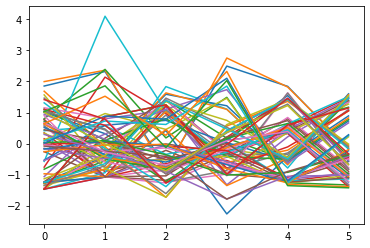

In [89]:
for row, _ in scaled_dim_red.iterrows():
    plt.plot(scaled_dim_red.iloc[row, :])

In [81]:
X_train, X_test, y_train, y_test = train_test_split(scaled_dim_red, df_labels, stratify=df_labels, test_size=0.25)
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

100%|█████████████████████████████████████████████████████████████████████| 29/29 [00:47<00:00,  1.62s/it]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LabelPropagation                   0.84               0.81    None      0.80   
LabelSpreading                     0.84               0.81    None      0.80   
DecisionTreeClassifier             0.84               0.75    None      0.83   
ExtraTreesClassifier               0.84               0.75    None      0.82   
RandomForestClassifier             0.84               0.75    None      0.82   
BaggingClassifier                  0.79               0.71    None      0.78   
KNeighborsClassifier               0.79               0.69    None      0.75   
NuSVC                              0.79               0.69    None      0.75   
LGBMClassifier                     0.74               0.65    None      0.71   
LogisticRegression                 0.74               0.65    None      0.71   
NearestCentroid                    0.74 

### Recap Feature Engineering
- reducing the number of features increases the model performance
- using dim reduction methods to decreae number of features, increased especially the performance of tree-based methods
- selecting "relevant" frequencies results in the best overall models, but does not have a large effect on tree-based approaches
- designing the training/test set, does not make sense at this stage, since the data and target variable should change in the future

### Hyperparameter tuning of selected models
- use the two reduced datasets from the feature engineering section
- use the following methods and tune on both dataset:
  - RandomForest
  - SVC
  - Label Probagation

In [138]:
from sklearn.metrics import classification_report
from numpy import *
random.seed(1234)

In [171]:
def fine_tune(df, labels, param_grid, clf):
    X_train, X_test, y_train, y_test = train_test_split(df, labels, stratify=labels, test_size=0.25)

    grid = RandomizedSearchCV(clf, param_grid, refit = False, verbose = 1, n_jobs=-1, cv=5)
    X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.25, stratify=labels, random_state=42)
    with parallel_backend('threading', n_jobs=-1):
        grid.fit(X_train, y_train)
    best_params = grid.best_params_
    print(best_params)
    # fit best classifier
    return grid

def predict(df, labels, clf):
    X_train, X_test, y_train, y_test = train_test_split(df, labels, stratify=labels, test_size=0.25)
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    print(classification_report(y_true=y_test, y_pred=preds))
    return preds, y_train

In [172]:
from joblib import parallel_backend



In [173]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC




In [174]:

print(grid.best_params_)

{'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20, 'bootstrap': False}


In [175]:
import numpy as np

In [ ]:
np.randomdomdom()

#### Random Forest

In [98]:
from sklearn.ensemble import RandomForestClassifier

#### With dim compression

In [176]:
param_grid = {'bootstrap': [True, False],
              'max_depth': [1,2,3,5,10, 20, 30, 40, 50, None],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [10, 20, 50, 100, 200]}
clf = RandomForestClassifier(random_state=random.seed(1234))
params_rf_dim = fine_tune(scaled_dim_red, df_labels, param_grid, clf)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 20, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}


#### With frequency select

In [177]:
clf = RandomForestClassifier(random_state=random.seed(1234))
params_rf_freq = fine_tune(df_var_features_scaled, df_labels, param_grid, clf)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 5, 'bootstrap': False}


#### SVM
##### for frequency

In [188]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly', 'sigmoid']} 
clf = SVC(random_state=random.seed(1234))
params_svc_dim = fine_tune(df_var_features_scaled, df_labels, param_grid, clf)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'kernel': 'rbf', 'gamma': 0.01, 'C': 1000}


##### for dim reduction

In [179]:
clf = SVC(random_state=random.seed(1234))
params_svc_freq = fine_tune(scaled_dim_red, df_labels, param_grid, clf)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'kernel': 'rbf', 'gamma': 0.01, 'C': 1000}


#### Label Propagation
with frequency reduction

In [180]:
    from sklearn.semi_supervised import LabelPropagation
    param_grid = {"kernel": ["knn", "rbf"],
             "n_neighbors": [2,3,5,7,9,15]}

    clf = LabelPropagation()
    params_lp_freq = fine_tune(df_var_features_scaled, df_labels, param_grid, clf)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_neighbors': 3, 'kernel': 'knn'}


with dim reduction


In [181]:
clf = LabelPropagation()
params_lp_dim = fine_tune(scaled_dim_red, df_labels, param_grid, clf)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_neighbors': 5, 'kernel': 'knn'}


## Train, test with best params
Now that we've found the best parameter for our models, we use this params to train and test the actual classifier.
Bonus, we look at the wronlgy predicted  samples and visualize them in the plots of notebook 03

In [182]:
clf = RandomForestClassifier(**params_rf_dim.best_params_, random_state=random.seed(1234))
preds, y_true = predict(scaled_dim_red, df_labels,clf )

                precision    recall  f1-score   support

    emptyBeads       1.00      1.00      1.00         6
 highlyCovered       0.83      0.71      0.77         7
lightlyCovered       1.00      0.50      0.67         2
 mediumCovered       0.50      0.75      0.60         4

      accuracy                           0.79        19
     macro avg       0.83      0.74      0.76        19
  weighted avg       0.83      0.79      0.80        19



In [183]:
clf = RandomForestClassifier(**params_rf_freq.best_params_, random_state=random.seed(1234))
preds, y_true = predict(df_var_features, df_labels,clf )

                precision    recall  f1-score   support

    emptyBeads       1.00      0.83      0.91         6
 highlyCovered       0.88      1.00      0.93         7
lightlyCovered       0.50      0.50      0.50         2
 mediumCovered       0.75      0.75      0.75         4

      accuracy                           0.84        19
     macro avg       0.78      0.77      0.77        19
  weighted avg       0.85      0.84      0.84        19



In [184]:
clf = SVC(**params_svc_dim.best_params_, random_state=random.seed(1234))
preds, y_true = predict(scaled_dim_red, df_labels,clf )


                precision    recall  f1-score   support

    emptyBeads       0.00      0.00      0.00         6
 highlyCovered       0.37      1.00      0.54         7
lightlyCovered       0.00      0.00      0.00         2
 mediumCovered       0.00      0.00      0.00         4

      accuracy                           0.37        19
     macro avg       0.09      0.25      0.13        19
  weighted avg       0.14      0.37      0.20        19



In [185]:
clf = SVC(**params_svc_dim.best_params_, random_state=random.seed(1234))
preds, y_true = predict(df_var_features, df_labels,clf )

                precision    recall  f1-score   support

    emptyBeads       1.00      1.00      1.00         6
 highlyCovered       1.00      1.00      1.00         7
lightlyCovered       1.00      0.50      0.67         2
 mediumCovered       0.80      1.00      0.89         4

      accuracy                           0.95        19
     macro avg       0.95      0.88      0.89        19
  weighted avg       0.96      0.95      0.94        19



In [186]:
clf = LabelPropagation(**params_lp_freq.best_params_)
preds, y_true = predict(df_var_features, df_labels,clf )

                precision    recall  f1-score   support

    emptyBeads       0.75      1.00      0.86         6
 highlyCovered       0.78      1.00      0.88         7
lightlyCovered       0.00      0.00      0.00         2
 mediumCovered       1.00      0.50      0.67         4

      accuracy                           0.79        19
     macro avg       0.63      0.62      0.60        19
  weighted avg       0.73      0.79      0.73        19



In [187]:
clf = LabelPropagation(**params_lp_freq.best_params_)
preds, y_true = predict(df_var_features, df_labels,clf )

                precision    recall  f1-score   support

    emptyBeads       0.86      1.00      0.92         6
 highlyCovered       0.78      1.00      0.88         7
lightlyCovered       1.00      0.50      0.67         2
 mediumCovered       1.00      0.50      0.67         4

      accuracy                           0.84        19
     macro avg       0.91      0.75      0.78        19
  weighted avg       0.87      0.84      0.82        19

